In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
airbnb = pd.read_csv('airbnb_2.csv')

# Looking at Data types

In [11]:
print(airbnb.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

# Total Listings for each of the five neighbourhoods

In [12]:
Airbnb_Count = airbnb.groupby('neighbourhood_group').calculated_host_listings_count.count().sort_values(ascending=False)
print(Airbnb_Count)

neighbourhood_group
Manhattan        21661
Brooklyn         20104
Queens            5666
Bronx             1091
Staten Island      373
Name: calculated_host_listings_count, dtype: int64


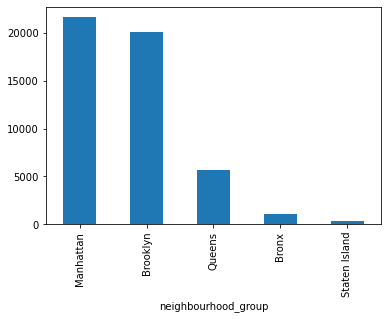

In [13]:
fig,ax= plt.subplots()
Airbnb_Count.plot(kind='bar')
plt.show()

# Finding the percent of listings in each Neighbourhood

In [14]:
listing_sum = airbnb.groupby('neighbourhood_group').calculated_host_listings_count.count().sum()
listing_pct = Airbnb_Count / listing_sum
print(listing_pct)

neighbourhood_group
Manhattan        0.443011
Brooklyn         0.411167
Queens           0.115881
Bronx            0.022313
Staten Island    0.007629
Name: calculated_host_listings_count, dtype: float64


# Adding a Revenue coulmn to the df

In [15]:
airbnb['revenue'] = airbnb.price * airbnb.number_of_reviews

# Finding average Revenue per neighbourhood group

In [16]:
revenues = airbnb.groupby('neighbourhood_group').revenue.mean().sort_values(ascending=False)
print(revenues)

neighbourhood_group
Manhattan        3375.960574
Brooklyn         2927.567400
Staten Island    2541.764075
Queens           2400.151077
Bronx            1999.439963
Name: revenue, dtype: float64


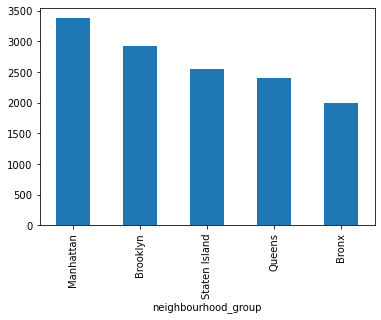

In [17]:
fig,ax = plt.subplots()
revenues.plot(x='neighbourhood_group',y='revenue',kind='bar')
plt.show()

# Filtering neighborhood group by top three highest revenue for highest revenue per neighborhood

In [20]:
manhattan = airbnb['neighbourhood_group'] == 'Manhattan'
brooklyn = airbnb['neighbourhood_group'] == 'Brooklyn'
queens = airbnb['neighbourhood_group'] == 'Staten Island'

airbnb_filt = airbnb[manhattan | brooklyn | queens]
grouped = airbnb_filt.groupby(['neighbourhood_group','neighbourhood'])['revenue'].sum().reset_index()
top3 = grouped.sort_values(['revenue'],ascending=False).groupby('neighbourhood_group').head(3).sort_values('neighbourhood_group')
top3

,neighbourhood_group,neighbourhood,revenue
45,Brooklyn,Williamsburg,12389011
2,Brooklyn,Bedford-Stuyvesant,12352457
10,Brooklyn,Bushwick,4762224
57,Manhattan,Harlem,8598692
58,Manhattan,Hell's Kitchen,8238991
52,Manhattan,East Village,7574535
113,Staten Island,St. George,193877
116,Staten Island,Tompkinsville,155696
114,Staten Island,Stapleton,86499


# Finding the top average revenue generating room type for each of the nine neighbourhoods

<AxesSubplot:title={'center':'Popular Airbnb Neighbourhoods by Room Type'}, xlabel='neighbourhood,room_type'>

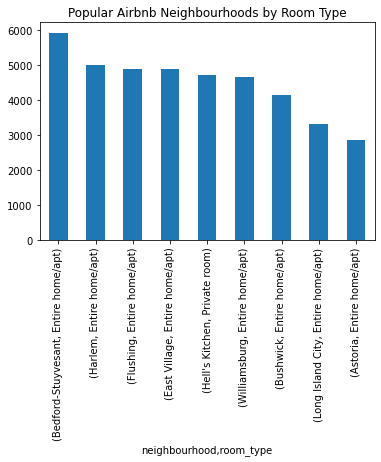

In [51]:
neighbourhood_filt = airbnb[airbnb['neighbourhood'].isin(['Williamsburg', 'Bedford-Stuyvesant', 'Harlem', "Hell's Kitchen",'East Village', 'Bushwick', 'Astoria', 'Long Island City', 'Flushing'])]
avg_mean = neighbourhood_filt.groupby(['neighbourhood','room_type'])['revenue'].mean().sort_values(ascending=False)
df = avg_mean.groupby(['neighbourhood']).head(1)

df.plot(kind='bar',title='Popular Airbnb Neighbourhoods by Room Type')